In [1]:
from typing import List

tricks = []

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


Shape of X_train:  (1252, 100, 100, 3)
Shape of Y_train:  (1252, 1)
Shape of X_test:  (313, 100, 100, 3)
Shape of Y_test:  (313, 1)


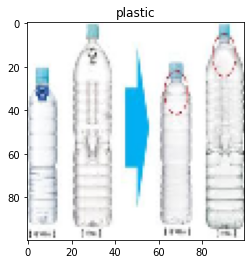

In [3]:
import os
import cv2
import random

def load_images_and_labels(data_path, img_size=(100, 100)):
    images = []
    labels = []
    for label, class_name in enumerate(['plastic', 'not_plastic']):
        class_path = os.path.join(data_path, class_name)
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            if os.path.isfile(img_path):
                img = cv2.imread(img_path)
                img = cv2.resize(img, img_size)
                if img.shape == (100, 100, 3):  # Ensure image is in the correct format
                    images.append(img)
                    labels.append(label)  # 0 for plastic, 1 for not_plastic
    return np.array(images), np.array(labels)

# Load the datasets
X_train, Y_train = load_images_and_labels(r'C:\Users\meh\Desktop\rm\training')
X_test, Y_test = load_images_and_labels(r'C:\Users\meh\Desktop\rm\testing')

# Reshape labels
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

# Visualize a random image
idx = random.randint(0, len(X_train) - 1)
plt.imshow(cv2.cvtColor((X_train[idx] * 255).astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('plastic' if Y_train[idx] == 0 else 'not_plastic')
plt.show()
# cv2.imshow('Image', X_train[idx])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])



In [5]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
20/20 [==============================] - 12s 490ms/step - loss: 0.6133 - accuracy: 0.6605
Epoch 2/5
20/20 [==============================] - 13s 660ms/step - loss: 0.5783 - accuracy: 0.7204
Epoch 3/5
20/20 [==============================] - 13s 657ms/step - loss: 0.4875 - accuracy: 0.7684
Epoch 4/5
20/20 [==============================] - 12s 620ms/step - loss: 0.4907 - accuracy: 0.7716
Epoch 5/5
20/20 [==============================] - 13s 641ms/step - loss: 0.4155 - accuracy: 0.8011


In [6]:
model.evaluate(X_test, Y_test)

10/10 [==============================] - 1s 56ms/step - loss: 0.5600 - accuracy: 0.7157


[0.5600379705429077, 0.7156549692153931]

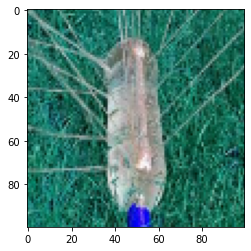

It is a : not plastic


In [252]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'plastic'
else:
    pred = 'not plastic'
    
print("It is a :", pred)